# Lab3 Assignment

## Please read the variable info at 'readme.html', choose at least two sets of variables to analyze including but not limited to, showing their basic statistic and visualization.

## Brief explain what you found. For example, you can show correlation between several variables and explain why their relation make sense,  or discover skewness, outlier etc for certain variables. 

In [1]:
# write code to load ariline the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

plt.rcParams.update(**{'figure.dpi':150})
plt.style.use('ggplot') # can skip this - plots are more visually appealing with this style

use_cols = [
    "Reporting_Airline", "DepDelay", "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"
]

# load data
total_rows = sum(1 for _ in open('On_Time_Reporting_Carrier_On_Time_Performance_2019_1.csv')) - 1
sample_size = 100000
skip_indices = sorted(random.sample(range(1, total_rows + 1), total_rows - sample_size))

reader = pd.read_csv(
    'On_Time_Reporting_Carrier_On_Time_Performance_2019_1.csv',
    usecols=use_cols,
    skiprows=skip_indices,
    chunksize=1000
)
data = pd.concat([chunk for chunk in reader])

basic statistics for average delay across airlines:
        DepDelay
count  17.000000
mean   10.080929
std     4.963404
min     0.489140
25%     7.007586
50%     9.631784
75%    12.107100
max    19.447253

basic statistics for causes of delay:
       CarrierDelay  WeatherDelay      NASDelay  SecurityDelay  \
count  17954.000000  17954.000000  17954.000000   17954.000000   
mean      20.443689      5.006962     19.073354       0.126323   
std       69.209258     43.885048     44.054240       6.446829   
min        0.000000      0.000000      0.000000       0.000000   
25%        0.000000      0.000000      0.000000       0.000000   
50%        0.000000      0.000000      6.000000       0.000000   
75%       16.000000      0.000000     22.000000       0.000000   
max     1431.000000   1332.000000   1447.000000     816.000000   

       LateAircraftDelay  
count       17954.000000  
mean           24.966470  
std            51.303504  
min             0.000000  
25%             0.000000  

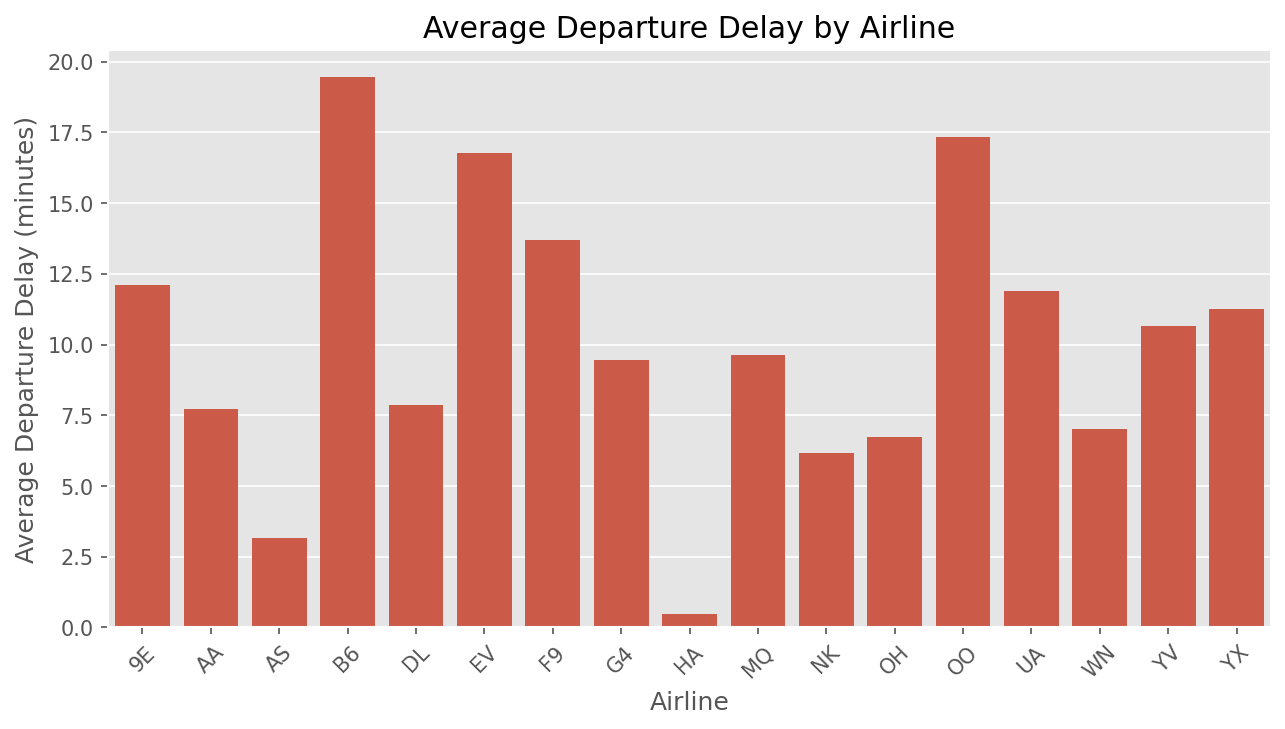

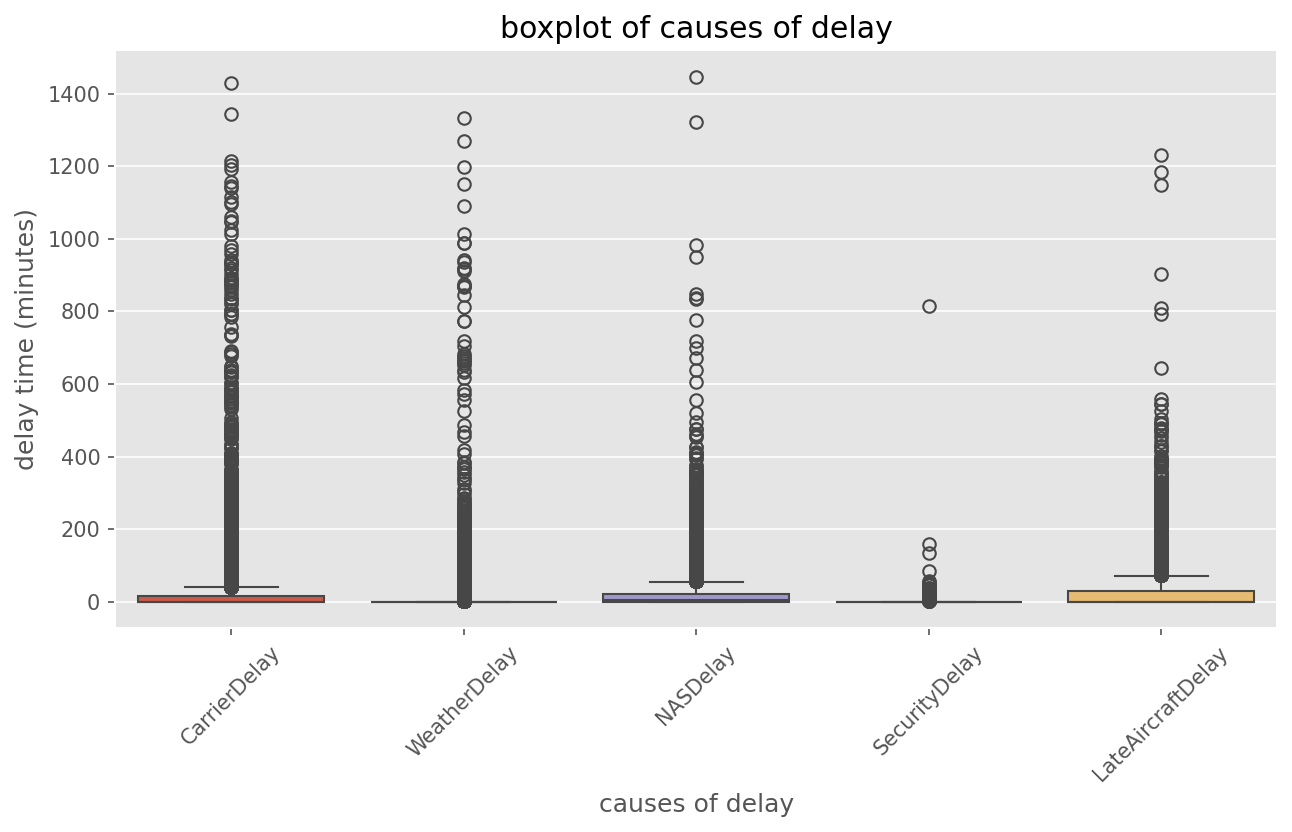

In [7]:
# selecting vars of interest
delay_data = data[['Reporting_Airline', 'DepDelay']]
causes_data = data[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]

delay_data = delay_data.groupby('Reporting_Airline')['DepDelay'].mean().reset_index()

# basic statistics
print("basic statistics for average departure delay across airlines:")
print(delay_data.describe())
print("\nbasic statistics for causes of delay:")
print(causes_data.describe())

# visualization
# distribution of avg delay by airline
plt.figure(figsize=(10, 5))
sns.barplot(data=average_delay_by_airline, x='Reporting_Airline', y='DepDelay', dodge=False, legend=False)
plt.title('average departure delay by airline')
plt.xlabel('airline')
plt.ylabel('average departure delay (minutes)')
plt.xticks(rotation=45)
plt.show()

# distribution of causes of delay
plt.figure(figsize=(10, 5))
sns.boxplot(data=causes_data)
plt.title('boxplot of causes of delay')
plt.xlabel('causes of delay')
plt.ylabel('delay time (minutes)')
plt.xticks(rotation=45)
plt.show()

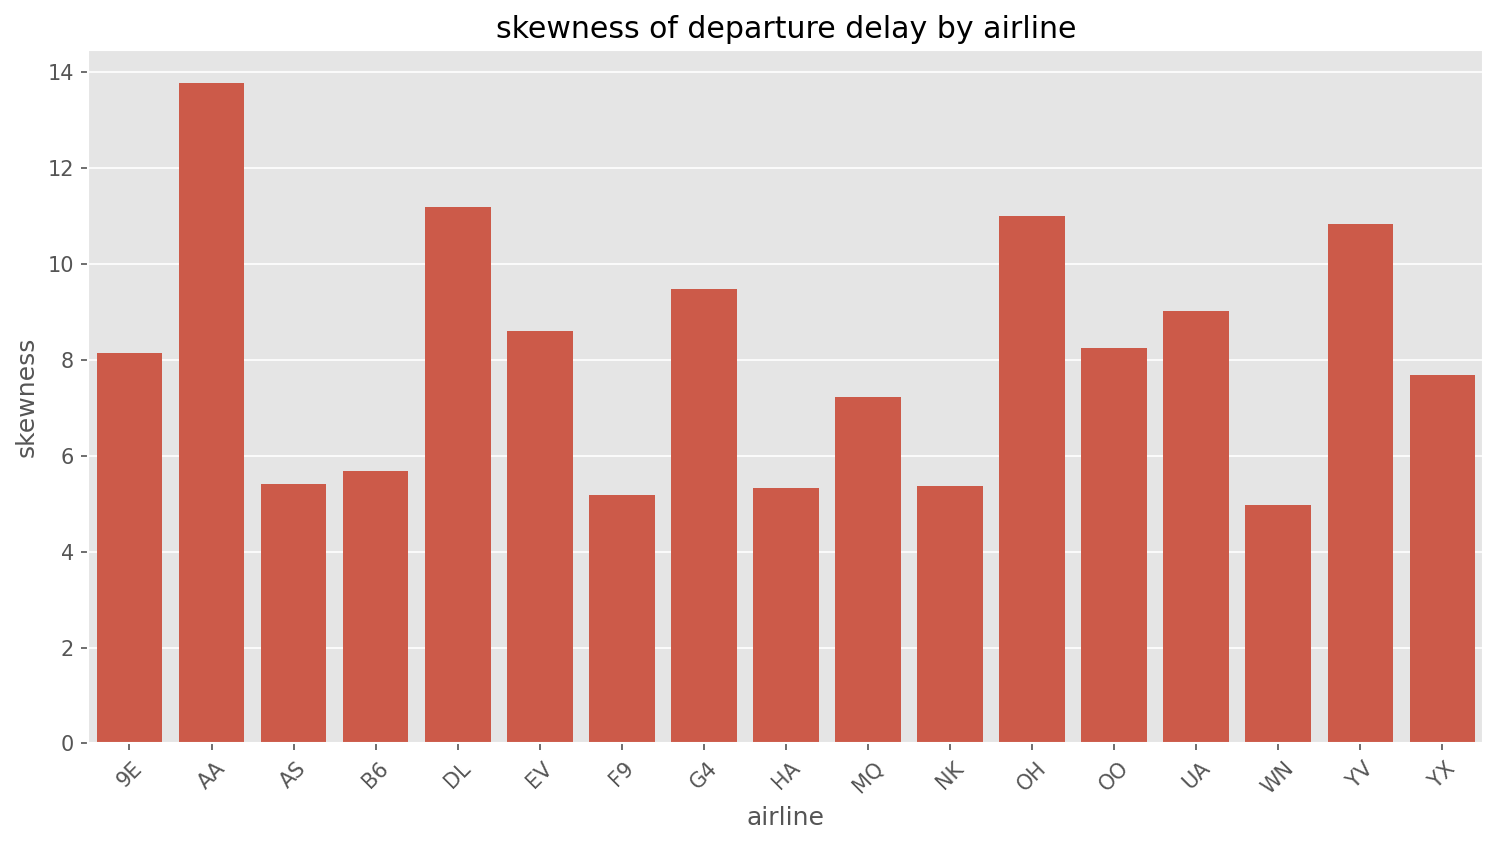

   Reporting_Airline  DepDelay_mean  DepDelay_skew
0                 9E      12.107100       8.142613
1                 AA       7.712528      13.765118
2                 AS       3.156948       5.413912
3                 B6      19.447253       5.673814
4                 DL       7.860940      11.194451
5                 EV      16.757843       8.595332
6                 F9      13.710526       5.176054
7                 G4       9.446661       9.478006
8                 HA       0.489140       5.329641
9                 MQ       9.631784       7.221659
10                NK       6.173566       5.374544
11                OH       6.740399      11.009498
12                OO      17.337318       8.255893
13                UA      11.879766       9.024921
14                WN       7.007586       4.962909
15                YV      10.650404      10.840262
16                YX      11.266033       7.687398
It seems that the majority of airlines have a positive skewness value, suggesting 

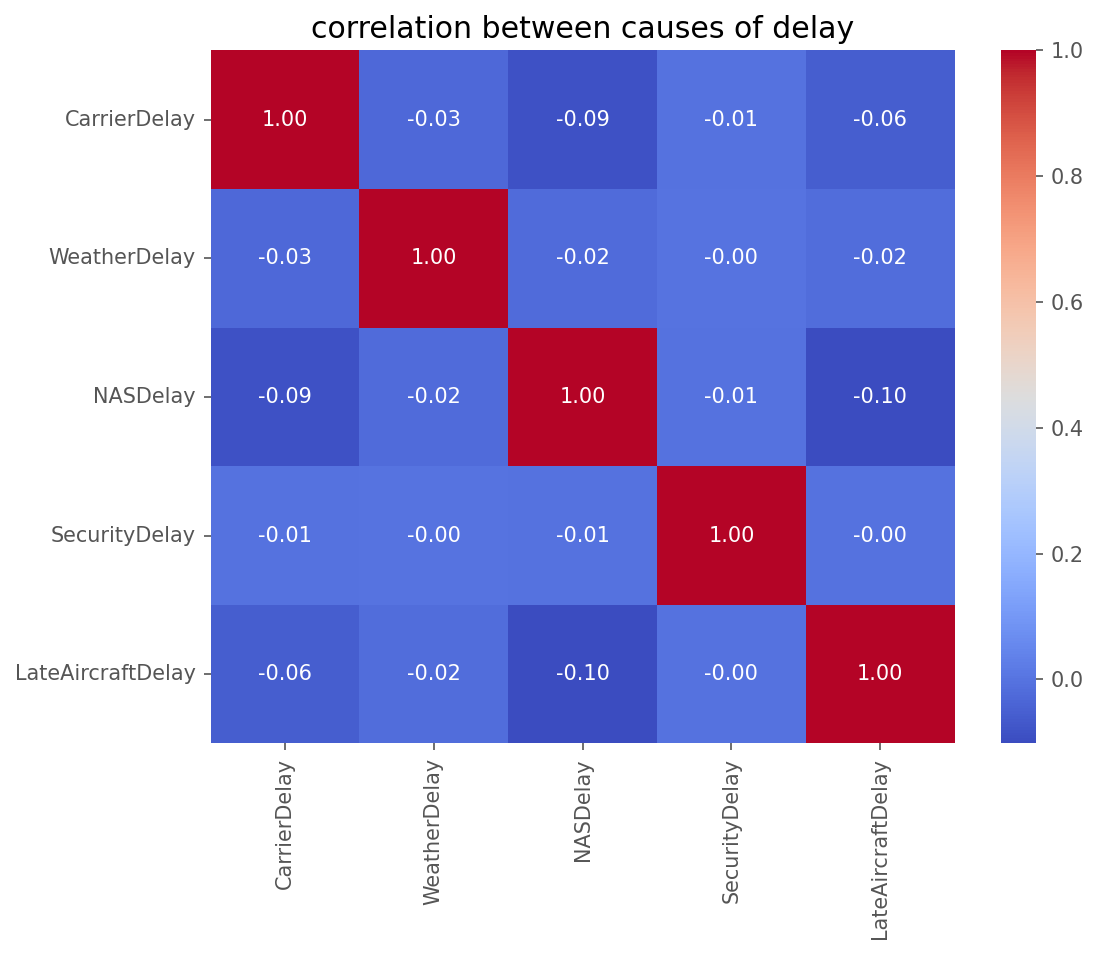

There are no causes of delay with correlation. The correlation values are all 0 or negative, implying no relation between the variables


In [16]:
# skewness for average delay time in airlines
delay_data = data[['Reporting_Airline', 'DepDelay']]

# average departure delay
average_delay = delay_data.groupby('Reporting_Airline')['DepDelay'].mean().reset_index()

# skewness for each airline
skewness = delay_data.groupby('Reporting_Airline')['DepDelay'].skew().reset_index()

# Merge skewness data with average delay data
delay_skewness = pd.merge(average_delay, skewness, on='Reporting_Airline', suffixes=('_mean', '_skew'))

# Visualize skewness
plt.figure(figsize=(12, 6))
sns.barplot(data=delay_skewness, x='Reporting_Airline', y='DepDelay_skew')
plt.title('skewness of departure delay by airline')
plt.xlabel('airline')
plt.ylabel('skewness')
plt.xticks(rotation=45)
plt.show()

print(delay_skewness)
print('It seems that the majority of airlines have a positive skewness value, suggesting a right tail in the distributions for departure delay. There were more long departure delays than short delays.')

# correlation between causes of delay
causes_correlation = causes_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(causes_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('correlation between causes of delay')
plt.show()
print('There are no causes of delay with correlation. The correlation values are all 0 or negative, implying no relation between the variables.')